<a href="https://colab.research.google.com/github/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Supp_Fig_10/Supp_Fig_10abc/test_cfc_code_palmdb2palmdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check detection of reverse translated RdRP sequences using comma-free code (cfc)

In [1]:
# Download the customized transcripts to gene mapping
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/palmdb_clustered_t2g.txt
# Download the RdRP amino acid sequences
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/palmdb_rdrp_seqs.fa

palmdb = "palmdb_rdrp_seqs.fa"
virus_t2g = "palmdb_clustered_t2g.txt"

--2023-12-11 20:03:55--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/palmdb_clustered_t2g.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4561689 (4.3M) [text/plain]
Saving to: ‘palmdb_clustered_t2g.txt’

palmdb_clustered_t2 100%[===================>]   4.35M  16.3MB/s    in 0.3s    

2023-12-11 20:03:57 (16.3 MB/s) - ‘palmdb_clustered_t2g.txt’ saved [4561689/4561689]

--2023-12-11 20:03:57--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/palmdb_rdrp_seqs.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaitin

In [2]:
# Install kallisto from source
!git clone -q https://github.com/pachterlab/kallisto.git
!cd kallisto && mkdir build && cd build && cmake .. && make

# Install bustools from source
!git clone -q https://github.com/BUStools/bustools.git
!cd bustools && mkdir build && cd build && cmake .. && make

# Define paths to kallisto and bustools binaries
kallisto = "/content/kallisto/build/src/kallisto"
bustools = "/content/bustools/build/src/bustools"

CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test COMPILER_SUPPORTS_CXX17
-- Performing Test COMPILER_SUPPORTS_CXX17 - Success
shared build
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_P

In [3]:
# Number of threads used for alignments
threads = 2

### Download PalmDB RdRP sequences reverse transalted to nucleotides as shown [here](https://github.com/pachterlab/LSCHWCP_2023/blob/main/Notebooks/Figure_3/Figure_3b/validate_palmdb2palmdb.ipynb):

In [4]:
!wget https://github.com/pachterlab/LSCHWCP_2023/raw/main/Notebooks/Figure_3/Figure_3b/palmdb_rdrp_seqs_nucleotides.fasta.zip
!unzip palmdb_rdrp_seqs_nucleotides.fasta.zip
palmdb_nn_fasta = "palmdb_rdrp_seqs_nucleotides.fasta"

--2023-12-11 20:09:34--  https://github.com/pachterlab/LSCHWCP_2023/raw/main/Notebooks/Figure_3/Figure_3b/palmdb_rdrp_seqs_nucleotides.fasta.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_3/Figure_3b/palmdb_rdrp_seqs_nucleotides.fasta.zip [following]
--2023-12-11 20:09:35--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/Notebooks/Figure_3/Figure_3b/palmdb_rdrp_seqs_nucleotides.fasta.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23125673 (22M) [application/zip]
Saving to: ‘palmdb_rdrp_seqs_nucleotides.fasta.zip’

palmdb_r

### Generate reference index from PalmDB amino acid sequences:

In [5]:
out_folder = "testing_cfc"
sample = "palmdb_vs_palmdb"

In [6]:
# Generate virus reference index
virus_index = "index.idx"
!$kallisto index \
    --aa \
    -t $threads \
    -i $virus_index \
    $palmdb


[build] loading fasta file palmdb_rdrp_seqs.fa
[build] k-mer length: 31
KmerStream::KmerStream(): Start computing k-mer cardinality estimations (1/2)
KmerStream::KmerStream(): Start computing k-mer cardinality estimations (1/2)
KmerStream::KmerStream(): Finished
CompactedDBG::build(): Estimated number of k-mers occurring at least once: 37641510
CompactedDBG::build(): Estimated number of minimizer occurring at least once: 7877811
CompactedDBG::filter(): Processed 87630084 k-mers in 296561 reads
CompactedDBG::filter(): Found 37508727 unique k-mers
CompactedDBG::filter(): Number of blocks in Bloom filter is 257317
CompactedDBG::construct(): Extract approximate unitigs (1/2)
CompactedDBG::construct(): Extract approximate unitigs (2/2)
CompactedDBG::construct(): Closed all input files

CompactedDBG::construct(): Splitting unitigs (1/2)

CompactedDBG::construct(): Splitting unitigs (2/2)
CompactedDBG::construct(): Before split: 2040580 unitigs
CompactedDBG::construct(): After split (1/1): 2

### Align using comma-free code:

In [7]:
!mkdir -p $out_folder

!$kallisto bus \
        --aa \
        -i $virus_index \
        -o $out_folder/$sample \
        -t $threads  \
        -x bulk \
        $palmdb_nn_fasta

!$bustools sort -o $out_folder/$sample/output_sorted.bus $out_folder/$sample/output.bus

!$bustools count \
    --genecounts \
    --cm -m \
    -o $out_folder/$sample/bustools_count/ \
    -g $virus_t2g \
    -e $out_folder/$sample/matrix.ec \
    -t $out_folder/$sample/transcripts.txt \
    $out_folder/$sample/output_sorted.bus


[index] k-mer length: 31
[index] number of targets: 296,561
[index] number of k-mers: 37,541,756
[quant] running in single-end mode
[quant] will process file 1: palmdb_rdrp_seqs_nucleotides.fasta
[quant] finding pseudoalignments for all files ... done
[quant] processed 296,561 reads, 288,295 reads pseudoaligned

 all fits in buffer
Read in 288295 BUS records
reading time 0.002766s
sorting time 0.028784s
writing time 0.015745s


### Load and plot results:

In [8]:
!pip install -q kb_python
import kb_python.utils as kb_utils
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%config InlineBackend.figure_format='retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.9 MB/s eta 0:00:00


In [9]:
# Load count matrix
# Filepath to counts
X = f"{out_folder}/{sample}/bustools_count/output.mtx"
# Filepath to barcode metadata
var_path = f"{out_folder}/{sample}/bustools_count/output.genes.txt"
# Filepath to gene metadata
obs_path = f"{out_folder}/{sample}/bustools_count/output.barcodes.txt"

# Create AnnData object
adata = kb_utils.import_matrix_as_anndata(X, obs_path, var_path)
adata

AnnData object with n_obs × n_vars = 1 × 99228

In [10]:
# Load virus ID to taxonomy mapping
!wget https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/ID_to_taxonomy_mapping.csv
rep_id_df = pd.read_csv("ID_to_taxonomy_mapping.csv")
rep_id_df

--2023-12-11 20:18:14--  https://raw.githubusercontent.com/pachterlab/LSCHWCP_2023/main/PalmDB/ID_to_taxonomy_mapping.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19705497 (19M) [text/plain]
Saving to: ‘ID_to_taxonomy_mapping.csv’

ID_to_taxonomy_mapp 100%[===================>]  18.79M  46.9MB/s    in 0.4s    

2023-12-11 20:18:16 (46.9 MB/s) - ‘ID_to_taxonomy_mapping.csv’ saved [19705497/19705497]



,ID,rep_ID,phylum,class,order,family,genus,species,strandedness
0,u1,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
1,u10066,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
2,u10121,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
3,u10124,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
4,u102609,u1,Pisuviricota,Pisoniviricetes,Nidovirales,Coronaviridae,Betacoronavirus,Severe acute respiratory syndrome-related coro...,+ssRNA
...,...,...,...,...,...,...,...,...,...
296556,u296608,u296608,.,.,.,.,.,.,unknown
296557,u296609,u296609,.,.,.,.,.,.,unknown
296558,u296613,u296613,.,.,.,.,.,.,unknown
296559,u296616,u296616,.,.,.,.,.,.,unknown


Record expected and observed counts for each virus ID (since the virus IDs are grouped based on taxonomy like transcripts of the same gene, we expect different numbers of counts for each representative virus ID):

In [11]:
%%time
counts = []
expected_counts = []
for virus_id in adata.var.index:
    counts.append(adata[:, adata.var.index==virus_id].X.sum())
    expected_counts.append(len(rep_id_df[rep_id_df["rep_ID"]==virus_id]))

CPU times: user 1h 32s, sys: 8.98 s, total: 1h 41s
Wall time: 1h 1min 22s


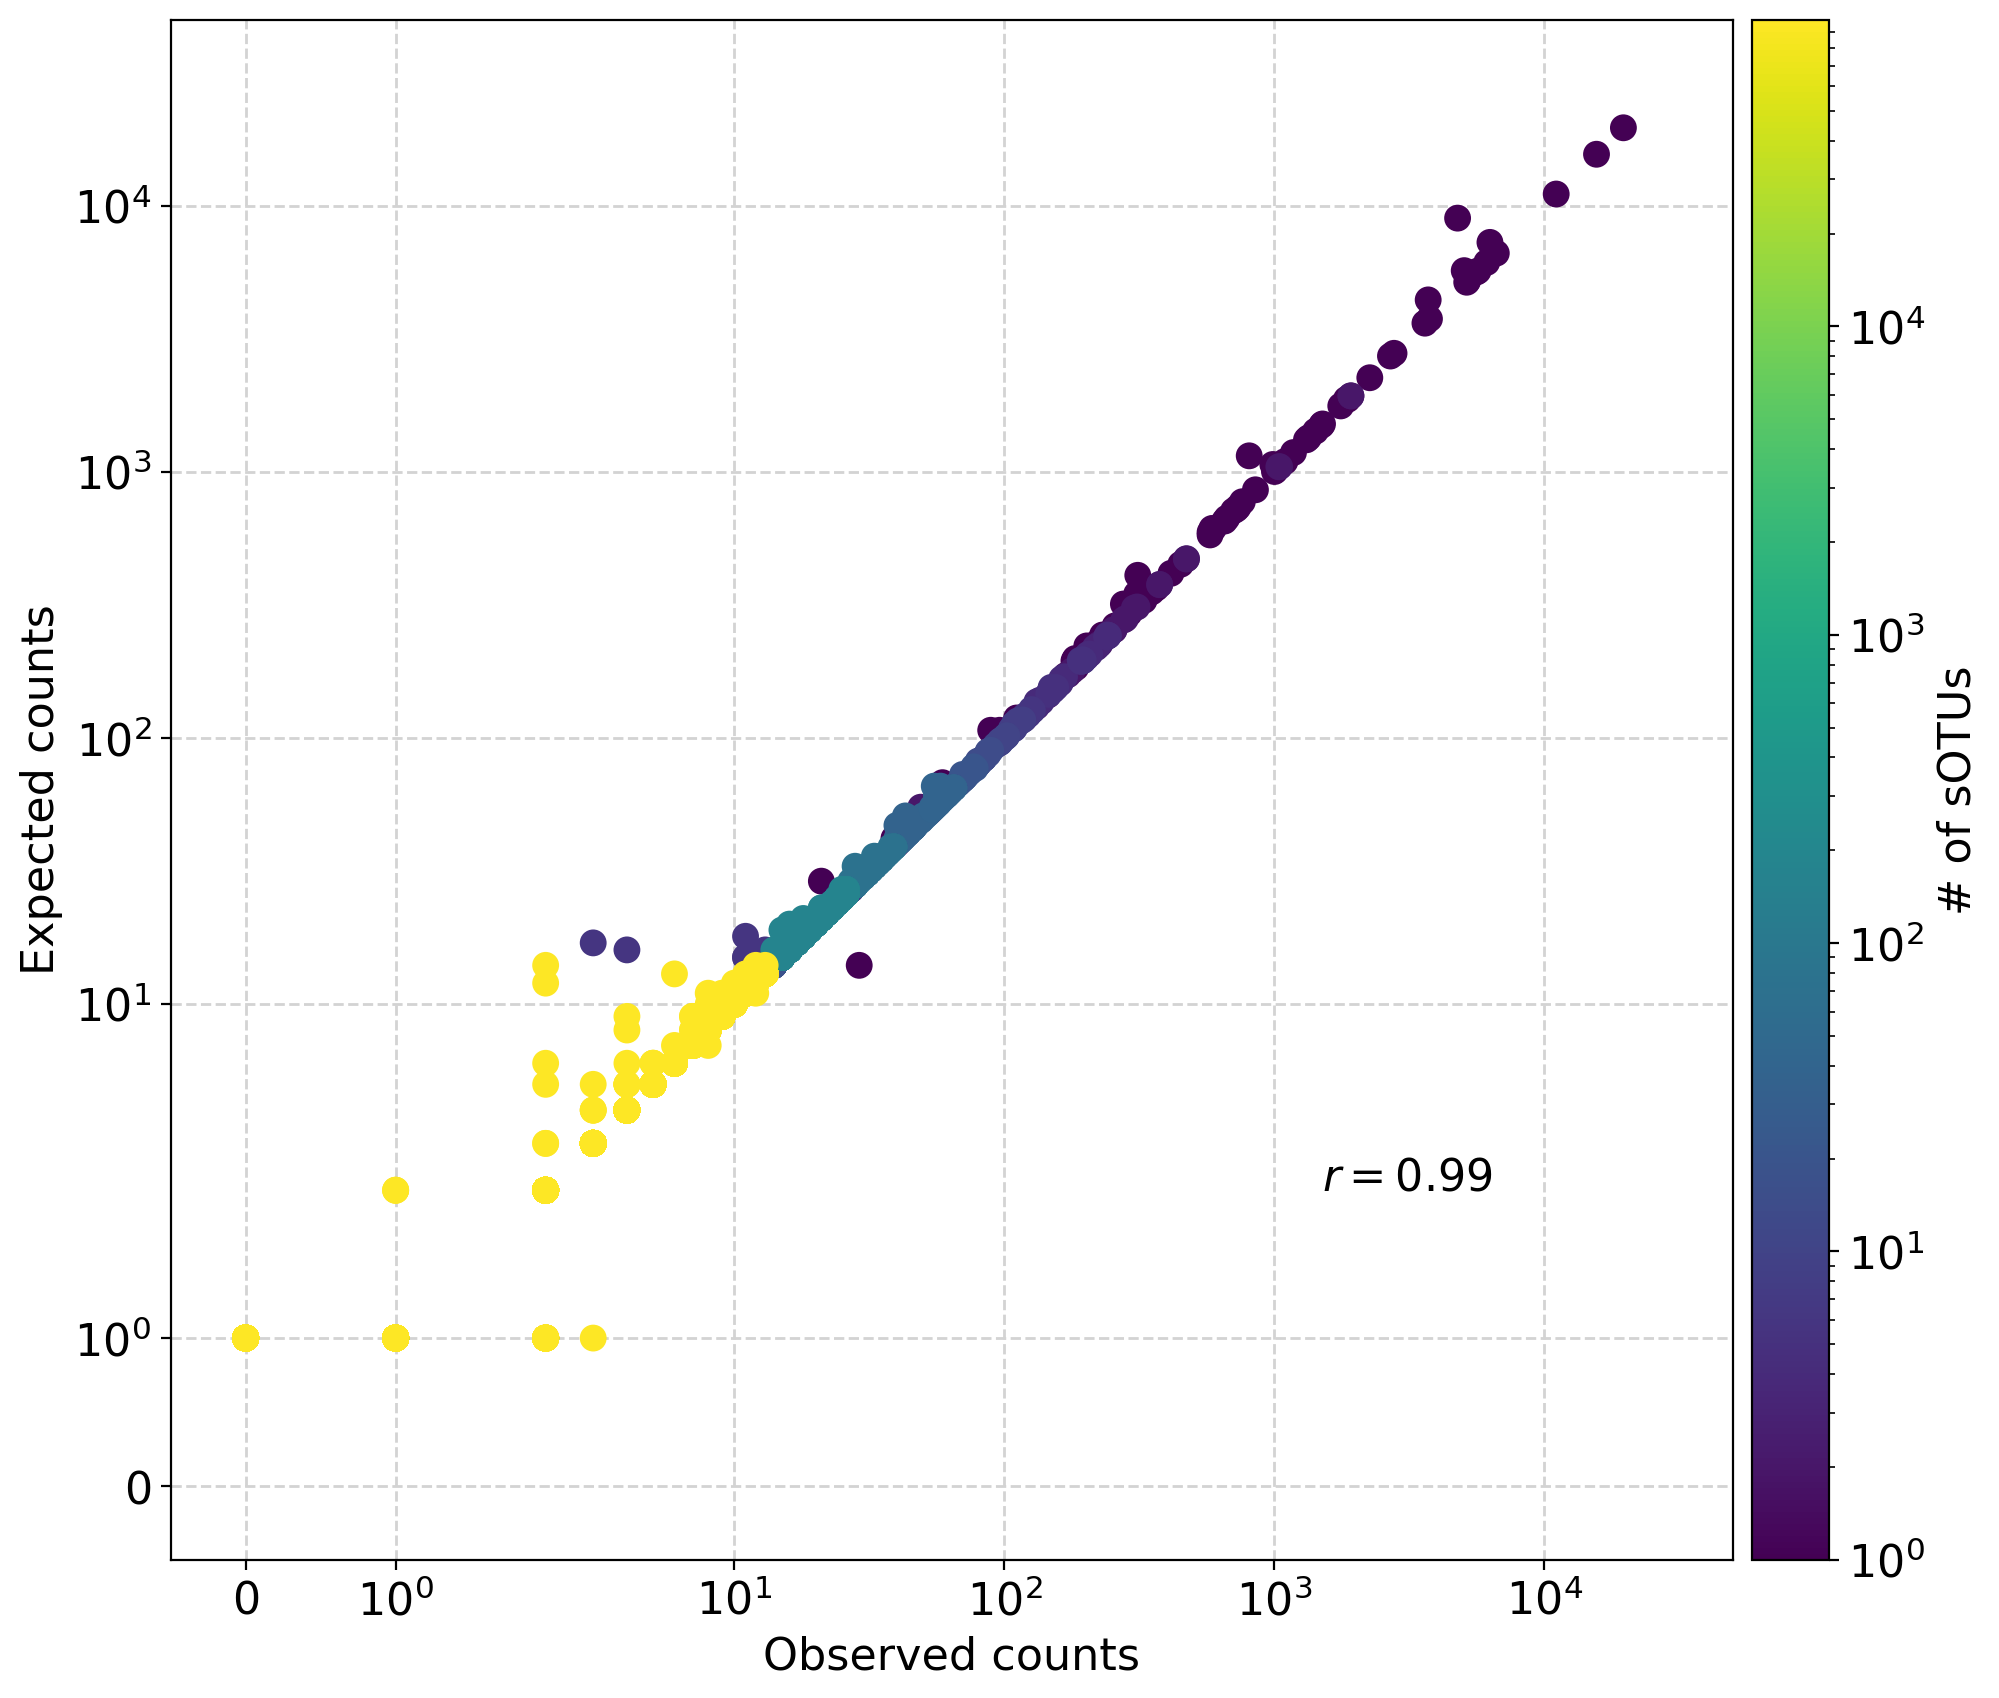

In [16]:
fig, ax = plt.subplots(figsize=(12,10))
fontsize = 16

x = np.array(counts)
y = np.array(expected_counts)

# Histogram data to show point density
bins = [1500, 1500]
hh, locx, locy = np.histogram2d(x, y, bins=bins)
z = np.array([hh[np.argmax(a<=locx[1:]),np.argmax(b<=locy[1:])] for a,b in zip(x,y)])
idx = z.argsort()
x2, y2, z2 = x[idx], y[idx], z[idx]

scatter = ax.scatter(x2, y2, c=z2, cmap="viridis", norm=matplotlib.colors.LogNorm(), s=75)

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.01)
cbar.ax.tick_params(axis="both", labelsize=fontsize)
cbar.ax.set_ylabel(f"# of sOTUs", fontsize=fontsize)

ax.set_ylim(bottom=-0.5, top=50000)
ax.set_xlim(left=-0.5, right=50000)

ax.set_yscale("symlog")
ax.set_xscale("symlog")

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_ylabel("Expected counts", fontsize=fontsize)
ax.set_xlabel("Observed counts", fontsize=fontsize)

# Add Pearson r
corr = pearsonr(np.array(counts), np.array(expected_counts))
ax.text(1500, 2, f"$r =  {np.round(corr, 2)[0]}$", fontsize=fontsize)

plt.savefig(f"expected_vs_observed_vir_counts_{sample}_cfc.png", dpi=300, bbox_inches="tight")

fig.show()